In [1]:
import random
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from pycaret.regression import *
#from pycaret.time_series import *

import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [3]:
df = pd.read_csv('./data/API_data.csv')
df

,ID,SGG_NM,BJDONG_NM,BONBEON,BUBEON,BLDG_NM,DEAL_YMD,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,HOUSE_TYPE
0,0,구로구,오류동,6.0,244.0,J팰리스,20240113,18000,29.24,17.63,4.0,연립다세대
1,1,영등포구,양평동2가,43.0,14.0,CO-OP Residence,20240112,7600,16.98,26.58,9.0,오피스텔
2,2,성북구,정릉동,NaN,NaN,NaN,20240112,55200,37.08,156.00,0.0,단독다가구
3,3,강남구,역삼동,781.0,37.0,NaN,20240112,67000,44.85,25.88,3.0,연립다세대
4,4,은평구,역촌동,80.0,70.0,더라온,20240112,35000,54.37,33.25,4.0,연립다세대
...,...,...,...,...,...,...,...,...,...,...,...,...
1480264,1480264,금천구,시흥동,NaN,NaN,NaN,20140101,35900,167.40,113.30,0.0,단독다가구
1480265,1480265,은평구,진관동,88.0,0.0,은평뉴타운 우물골,20140101,65500,134.43,0.00,10.0,아파트
1480266,1480266,은평구,진관동,102.0,0.0,은평뉴타운 박석고개,20140101,44700,84.72,0.00,12.0,아파트
1480267,1480267,은평구,진관동,11.0,0.0,은평뉴타운상림마을,20140101,59900,134.91,0.00,9.0,아파트


In [4]:
df = df.drop(['ID'], axis = 1)
df

,SGG_NM,BJDONG_NM,BONBEON,BUBEON,BLDG_NM,DEAL_YMD,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,HOUSE_TYPE
0,구로구,오류동,6.0,244.0,J팰리스,20240113,18000,29.24,17.63,4.0,연립다세대
1,영등포구,양평동2가,43.0,14.0,CO-OP Residence,20240112,7600,16.98,26.58,9.0,오피스텔
2,성북구,정릉동,NaN,NaN,NaN,20240112,55200,37.08,156.00,0.0,단독다가구
3,강남구,역삼동,781.0,37.0,NaN,20240112,67000,44.85,25.88,3.0,연립다세대
4,은평구,역촌동,80.0,70.0,더라온,20240112,35000,54.37,33.25,4.0,연립다세대
...,...,...,...,...,...,...,...,...,...,...,...
1480264,금천구,시흥동,NaN,NaN,NaN,20140101,35900,167.40,113.30,0.0,단독다가구
1480265,은평구,진관동,88.0,0.0,은평뉴타운 우물골,20140101,65500,134.43,0.00,10.0,아파트
1480266,은평구,진관동,102.0,0.0,은평뉴타운 박석고개,20140101,44700,84.72,0.00,12.0,아파트
1480267,은평구,진관동,11.0,0.0,은평뉴타운상림마을,20140101,59900,134.91,0.00,9.0,아파트


### 전처리

In [5]:
le = LabelEncoder()
df['SGG_NM'] = le.fit_transform(df['SGG_NM'])
df['BJDONG_NM'] = le.fit_transform(df['BJDONG_NM'])
df['HOUSE_TYPE'] = le.fit_transform(df['HOUSE_TYPE'])
df

,SGG_NM,BJDONG_NM,BONBEON,BUBEON,BLDG_NM,DEAL_YMD,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,HOUSE_TYPE
0,6,278,6.0,244.0,J팰리스,20240113,18000,29.24,17.63,4.0,2
1,19,249,43.0,14.0,CO-OP Residence,20240112,7600,16.98,26.58,9.0,3
2,16,341,NaN,NaN,NaN,20240112,55200,37.08,156.00,0.0,0
3,0,255,781.0,37.0,NaN,20240112,67000,44.85,25.88,3.0,2
4,21,256,80.0,70.0,더라온,20240112,35000,54.37,33.25,4.0,2
...,...,...,...,...,...,...,...,...,...,...,...
1480264,7,214,NaN,NaN,NaN,20140101,35900,167.40,113.30,0.0,0
1480265,21,355,88.0,0.0,은평뉴타운 우물골,20140101,65500,134.43,0.00,10.0,1
1480266,21,355,102.0,0.0,은평뉴타운 박석고개,20140101,44700,84.72,0.00,12.0,1
1480267,21,355,11.0,0.0,은평뉴타운상림마을,20140101,59900,134.91,0.00,9.0,1


In [6]:
df['DEAL_YEAR'] = df['DEAL_YMD'].apply(lambda x:int(str(x)[:4]))
df['DEAL_MONTH'] = df['DEAL_YMD'].apply(lambda x:int(str(x)[4:6]))
df['DEAL_DAY'] = df['DEAL_YMD'].apply(lambda x:int(str(x)[6:]))
df

,SGG_NM,BJDONG_NM,BONBEON,BUBEON,BLDG_NM,DEAL_YMD,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,HOUSE_TYPE,DEAL_YEAR,DEAL_MONTH,DEAL_DAY
0,6,278,6.0,244.0,J팰리스,20240113,18000,29.24,17.63,4.0,2,2024,1,13
1,19,249,43.0,14.0,CO-OP Residence,20240112,7600,16.98,26.58,9.0,3,2024,1,12
2,16,341,NaN,NaN,NaN,20240112,55200,37.08,156.00,0.0,0,2024,1,12
3,0,255,781.0,37.0,NaN,20240112,67000,44.85,25.88,3.0,2,2024,1,12
4,21,256,80.0,70.0,더라온,20240112,35000,54.37,33.25,4.0,2,2024,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480264,7,214,NaN,NaN,NaN,20140101,35900,167.40,113.30,0.0,0,2014,1,1
1480265,21,355,88.0,0.0,은평뉴타운 우물골,20140101,65500,134.43,0.00,10.0,1,2014,1,1
1480266,21,355,102.0,0.0,은평뉴타운 박석고개,20140101,44700,84.72,0.00,12.0,1,2014,1,1
1480267,21,355,11.0,0.0,은평뉴타운상림마을,20140101,59900,134.91,0.00,9.0,1,2014,1,1


In [7]:
df = df.drop(['BLDG_NM','DEAL_YMD'],axis=1)
df

,SGG_NM,BJDONG_NM,BONBEON,BUBEON,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,HOUSE_TYPE,DEAL_YEAR,DEAL_MONTH,DEAL_DAY
0,6,278,6.0,244.0,18000,29.24,17.63,4.0,2,2024,1,13
1,19,249,43.0,14.0,7600,16.98,26.58,9.0,3,2024,1,12
2,16,341,NaN,NaN,55200,37.08,156.00,0.0,0,2024,1,12
3,0,255,781.0,37.0,67000,44.85,25.88,3.0,2,2024,1,12
4,21,256,80.0,70.0,35000,54.37,33.25,4.0,2,2024,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...
1480264,7,214,NaN,NaN,35900,167.40,113.30,0.0,0,2014,1,1
1480265,21,355,88.0,0.0,65500,134.43,0.00,10.0,1,2014,1,1
1480266,21,355,102.0,0.0,44700,84.72,0.00,12.0,1,2014,1,1
1480267,21,355,11.0,0.0,59900,134.91,0.00,9.0,1,2014,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480269 entries, 0 to 1480268
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   SGG_NM      1480269 non-null  int32  
 1   BJDONG_NM   1480269 non-null  int32  
 2   BONBEON     1365679 non-null  float64
 3   BUBEON      1365742 non-null  float64
 4   OBJ_AMT     1480269 non-null  int64  
 5   BLDG_AREA   1480269 non-null  float64
 6   TOT_AREA    1480269 non-null  float64
 7   FLOOR       1480269 non-null  float64
 8   HOUSE_TYPE  1480269 non-null  int32  
 9   DEAL_YEAR   1480269 non-null  int64  
 10  DEAL_MONTH  1480269 non-null  int64  
 11  DEAL_DAY    1480269 non-null  int64  
dtypes: float64(5), int32(3), int64(4)
memory usage: 118.6 MB


In [9]:
df['BUBEON'].min()

0.0

In [10]:
df['BONBEON'] = df['BONBEON'].replace(np.nan,-1)
df['BUBEON'] = df['BUBEON'].replace(np.nan,-1)

In [11]:
train_x = df[df['DEAL_YEAR'].isin([2023,2022,2021,2020,2019])]
test_x = df[df['DEAL_YEAR']==2024]

In [12]:
train_x = train_x.reset_index(drop=True)
train_x

,SGG_NM,BJDONG_NM,BONBEON,BUBEON,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,HOUSE_TYPE,DEAL_YEAR,DEAL_MONTH,DEAL_DAY
0,18,231,509.0,15.0,5800,32.86,15.01,-1.0,2,2023,12,31
1,2,148,461.0,62.0,18300,51.57,29.50,4.0,2,2023,12,31
2,11,182,903.0,0.0,147500,84.97,0.00,15.0,1,2023,12,31
3,9,146,632.0,0.0,26500,48.55,40.64,6.0,2,2023,12,31
4,6,278,339.0,0.0,46500,59.58,0.00,10.0,1,2023,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...
563426,12,199,249.0,23.0,77500,141.53,97.76,2.0,2,2019,1,1
563427,4,223,343.0,5.0,35000,41.28,27.66,2.0,2,2019,1,1
563428,19,68,223.0,12.0,24500,28.88,19.69,2.0,2,2019,1,1
563429,20,315,395.0,0.0,109000,84.78,0.00,3.0,1,2019,1,1


In [13]:
sup = setup(train_x, target = 'OBJ_AMT',session_id=42)

,Description,Value
0,Session id,42
1,Target,OBJ_AMT
2,Target type,Regression
3,Original data shape,"(563431, 12)"
4,Transformed data shape,"(563431, 12)"
5,Transformed train set shape,"(394401, 12)"
6,Transformed test set shape,"(169030, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [14]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [15]:
comp = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,7706.2936,820102818.8190,26985.3549,0.8589,0.2100,0.1416,40.5440
et,Extra Trees Regressor,8075.5901,850229836.2310,27475.5074,0.8542,0.2148,0.1477,89.6790
catboost,CatBoost Regressor,11702.0408,968366283.3246,29665.3359,0.8309,0.2909,0.2330,17.1820
xgboost,Extreme Gradient Boosting,11724.1350,988388237.0874,30046.4863,0.8270,0.2915,0.2304,1.0890
lightgbm,Light Gradient Boosting Machine,13835.2833,1050345241.8478,31117.5573,0.8155,0.3239,0.2766,0.8010
knn,K Neighbors Regressor,12586.6435,1363666445.0108,36021.6459,0.7544,0.2830,0.2136,0.7250
gbr,Gradient Boosting Regressor,18113.5545,1483913125.9566,37674.5019,0.7316,0.3976,0.3555,17.8820
dt,Decision Tree Regressor,10214.2957,1786926810.9628,40159.3559,0.6714,0.2831,0.1791,0.6420
lar,Least Angle Regression,26564.0818,2750460887.9166,52069.0632,0.4869,0.5853,0.5297,0.1020
ridge,Ridge Regression,26564.0772,2750460928.5755,52069.0636,0.4869,0.5853,0.5297,0.1040


In [16]:
rf = create_model('rf', cross_validation = False)
et = create_model('et',cross_validation = False)
catboost = create_model('catboost', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,7603.4348,720727170.6206,26846.3623,0.8780,0.2062,0.1380


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,7955.6545,625801272.3426,25016.0203,0.8941,0.2116,0.1445


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,11726.1198,1254007884.9300,35411.9738,0.7877,0.2913,0.2315


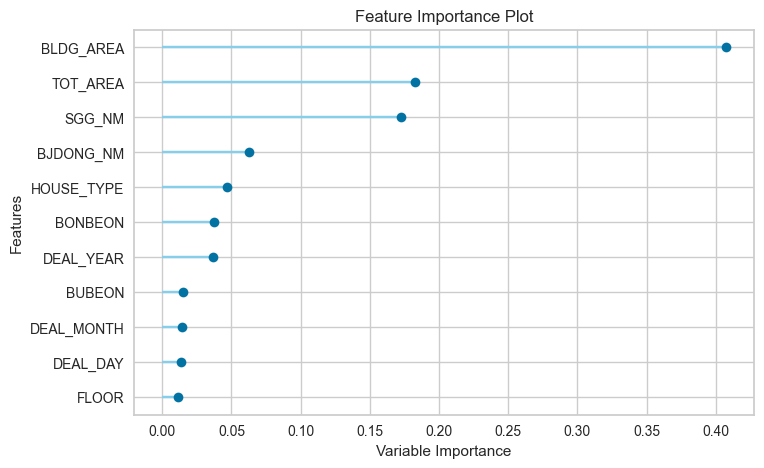

In [18]:
plot_model(rf, plot = 'feature_all')

In [17]:
blended_model = blend_models(estimator_list = [rf, et, catboost],optimize = 'RMSE')
final_model = finalize_model(blended_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:45:52
Status,. . . . . . . . . . . . . . . . . .,Finalizing Model
Estimator,. . . . . . . . . . . . . . . . . .,Voting Regressor


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

OSError: [WinError 87] 매개 변수가 틀립니다

In [88]:
final_model = finalize_model(comp)

MemoryError: Unable to allocate 4.30 MiB for an array with shape (563429,) and data type int64

In [19]:
test_y = test_x['OBJ_AMT']
test_x = test_x.drop(['OBJ_AMT'],axis=1)

In [20]:
preds = predict_model(rf,data=test_x)

In [21]:
preds

,SGG_NM,BJDONG_NM,BONBEON,BUBEON,BLDG_AREA,TOT_AREA,FLOOR,HOUSE_TYPE,DEAL_YEAR,DEAL_MONTH,DEAL_DAY,prediction_label
0,6,278,6.0,244.0,29.240000,17.629999,4.0,2,2024,1,13,18099.00
1,19,249,43.0,14.0,16.980000,26.580000,9.0,3,2024,1,12,7413.50
2,16,341,-1.0,-1.0,37.080002,156.000000,0.0,0,2024,1,12,90169.20
3,0,255,781.0,37.0,44.849998,25.879999,3.0,2,2024,1,12,60184.09
4,21,256,80.0,70.0,54.369999,33.250000,4.0,2,2024,1,12,29571.50
...,...,...,...,...,...,...,...,...,...,...,...,...
556,13,162,314.0,26.0,51.029999,29.530001,5.0,2,2024,1,2,36580.68
557,21,355,102.0,0.0,84.720001,0.000000,13.0,1,2024,1,1,86295.00
558,3,147,606.0,48.0,64.080002,35.130001,1.0,2,2024,1,1,31463.68
559,2,141,812.0,0.0,84.290001,0.000000,19.0,1,2024,1,1,85251.00


In [23]:
test_y

0      18000
1       7600
2      55200
3      67000
4      35000
       ...  
556    28000
557    97000
558    51500
559    80000
560    19000
Name: OBJ_AMT, Length: 561, dtype: int64

In [24]:
save_model(rf, './models/baseline_rf_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['SGG_NM', 'BJDONG_NM', 'BONBEON',
                                              'BUBEON', 'BLDG_AREA', 'TOT_AREA',
                                              'FLOOR', 'HOUSE_TYPE', 'DEAL_YEAR',
                                              'DEAL_MONTH', 'DEAL_DAY'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  RandomForestRegressor(n_jobs=-1, random_state=42))]),
 './models/baseline_rf_model.pkl')

In [3]:
model = load_model('./models/baseline_rf_model')

Transformation Pipeline and Model Successfully Loaded


In [14]:
test_y = test_x['OBJ_AMT']
test_x = test_x.drop(['OBJ_AMT'],axis=1)

In [26]:
preds = predict_model(model,data=test_x)

In [27]:
test_y

0      18000
1       7600
2      55200
3      67000
4      35000
       ...  
556    28000
557    97000
558    51500
559    80000
560    19000
Name: OBJ_AMT, Length: 561, dtype: int64

In [28]:
preds

,SGG_NM,BJDONG_NM,BONBEON,BUBEON,BLDG_AREA,TOT_AREA,FLOOR,HOUSE_TYPE,DEAL_YEAR,DEAL_MONTH,DEAL_DAY,prediction_label
0,6,278,6.0,244.0,29.240000,17.629999,4.0,2,2024,1,13,18099.00
1,19,249,43.0,14.0,16.980000,26.580000,9.0,3,2024,1,12,7413.50
2,16,341,-1.0,-1.0,37.080002,156.000000,0.0,0,2024,1,12,90169.20
3,0,255,781.0,37.0,44.849998,25.879999,3.0,2,2024,1,12,60184.09
4,21,256,80.0,70.0,54.369999,33.250000,4.0,2,2024,1,12,29571.50
...,...,...,...,...,...,...,...,...,...,...,...,...
556,13,162,314.0,26.0,51.029999,29.530001,5.0,2,2024,1,2,36580.68
557,21,355,102.0,0.0,84.720001,0.000000,13.0,1,2024,1,1,86295.00
558,3,147,606.0,48.0,64.080002,35.130001,1.0,2,2024,1,1,31463.68
559,2,141,812.0,0.0,84.290001,0.000000,19.0,1,2024,1,1,85251.00


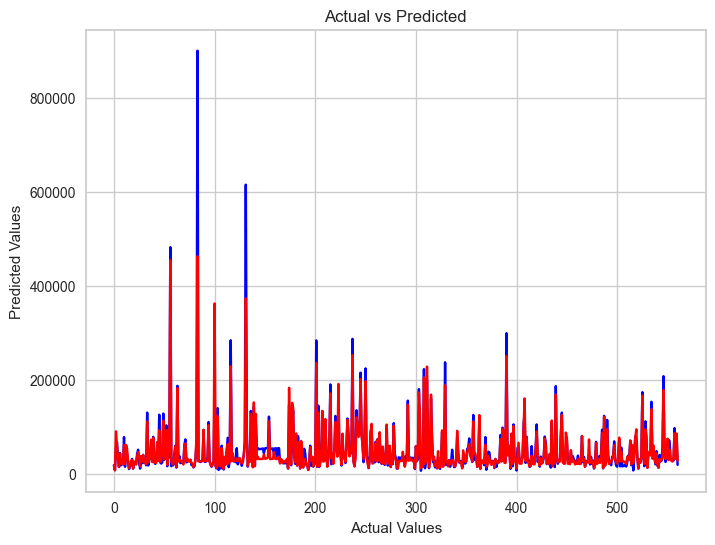

In [33]:
prediction = preds['prediction_label']  # 예측값

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(test_y, color='blue')
plt.plot(prediction, color='red')
plt.xlabel('Actual Values')   # x축 레이블
plt.ylabel('Predicted Values')   # y축 레이블
plt.title('Actual vs Predicted')   # 그래프 제목
plt.show()   # 그래프 출력

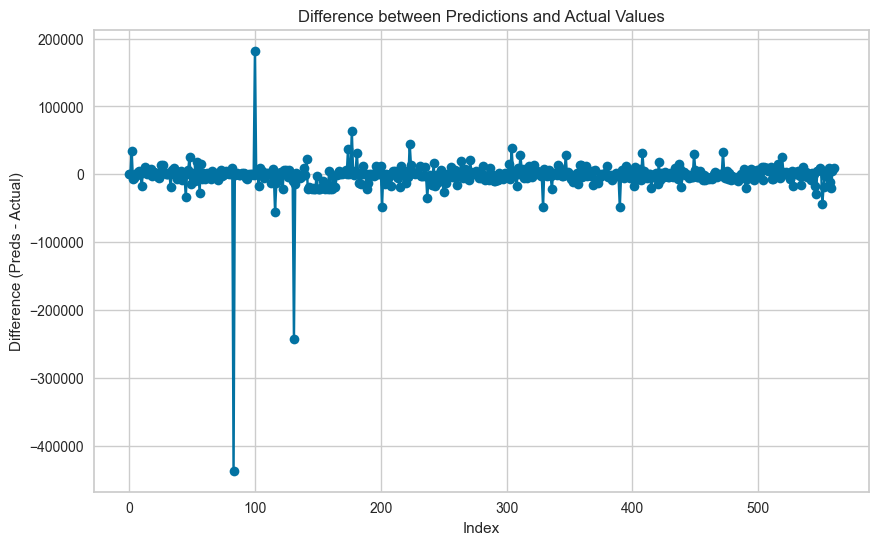

In [35]:
diff = prediction - test_y

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(diff, marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Difference (Preds - Actual)')
plt.title('Difference between Predictions and Actual Values')
plt.grid(True)
plt.show()

In [4]:
model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['SGG_NM', 'BJDONG_NM', 'BONBEON',
                                             'BUBEON', 'BLDG_AREA', 'TOT_AREA',
                                             'FLOOR', 'HOUSE_TYPE', 'DEAL_YEAR',
                                             'DEAL_MONTH', 'DEAL_DAY'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 RandomForestRegressor(n_jobs=-1, random_state=42))])